In [2]:
#import
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


In [115]:
#movies_df = pd.read_csv('dataset-ml-25m/movies.csv')
#ratings = pd.read_csv('dataset-ml-25m/ratings.csv')
#genome_scores = pd.read_csv('dataset-ml-25m/genome-scores.csv')
#genome_tags = pd.read_csv('dataset-ml-25m/genome-tags.csv')

# Printing the first 3 rows of each dataframe.
#print('Movies:')
#display(movies_df.head(3))
#print('Ratings:')
#display(ratings.head(3))
#print('Genome Scores:')
#display(genome_scores.head(3))
#print('Genome Tags:')
#display(genome_tags.head(3))



### Data Acquisition

In [4]:
movies_df = pd.read_csv('dataset-ml-25m/movies.csv', sep=',')
#One-hot encoding of genres for movies
genres = movies_df['genres'].str.get_dummies(sep='|')
movies_df = pd.concat([movies_df, genres], axis=1)
movies_df.drop('genres', axis=1, inplace=True)
movies_df.head(3)


,movieId,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [5]:
gen_tags = pd.read_csv('dataset-ml-25m/genome-tags.csv', sep=',')
gen_scores = pd.read_csv('dataset-ml-25m/genome-scores.csv', sep=',')

df = movies_df.merge(gen_scores,on='movieId')
df = df.merge(gen_tags, on='tagId')
df = df.pivot_table(index=['movieId', 'title'], columns='tag', values='relevance', fill_value=0).reset_index().rename_axis(None, axis=1)


In [6]:
df.head()

,movieId,title,007,007 (series),18th century,1920s,1930s,1950s,1960s,1970s,...,world politics,world war i,world war ii,writer's life,writers,writing,wuxia,wwii,zombie,zombies
0,1,Toy Story (1995),0.02875,0.02375,0.06250,0.07575,0.14075,0.14675,0.06350,0.20375,...,0.04050,0.01425,0.03050,0.03500,0.14125,0.05775,0.03900,0.02975,0.08475,0.02200
1,2,Jumanji (1995),0.04125,0.04050,0.06275,0.08275,0.09100,0.06125,0.06925,0.09600,...,0.05250,0.01575,0.01250,0.02000,0.12225,0.03275,0.02100,0.01100,0.10525,0.01975
2,3,Grumpier Old Men (1995),0.04675,0.05550,0.02925,0.08700,0.04750,0.04775,0.04600,0.14275,...,0.06275,0.01950,0.02225,0.02300,0.12200,0.03475,0.01700,0.01800,0.09100,0.01775
3,4,Waiting to Exhale (1995),0.03425,0.03800,0.04050,0.03100,0.06500,0.03575,0.02900,0.08650,...,0.05325,0.02800,0.01675,0.03875,0.18200,0.07050,0.01625,0.01425,0.08850,0.01500
4,5,Father of the Bride Part II (1995),0.04300,0.05325,0.03800,0.04100,0.05400,0.06725,0.02775,0.07650,...,0.05350,0.02050,0.01425,0.02550,0.19225,0.02675,0.01625,0.01300,0.08700,0.01600


In [7]:
ratings = pd.read_csv('dataset-ml-25m/ratings.csv', sep=',')
# Get the most frequent rating for each movie with mean
ratings = ratings.groupby(['movieId'])['rating'].mean().reset_index()
print (ratings.shape)

#Merge movies_rating with film rating
df = ratings.merge(df, on='movieId') 
df = df.drop(['movieId','title'], axis=1)


(59047, 2)


In [8]:
df.shape

(13816, 1129)

### Data Visualization

In [9]:
print(f'Number of samples: {df.shape[0]}')
df.describe()

Number of samples: 13816


,rating,007,007 (series),18th century,1920s,1930s,1950s,1960s,1970s,1980s,...,world politics,world war i,world war ii,writer's life,writers,writing,wuxia,wwii,zombie,zombies
count,13816.000000,13816.000000,13816.000000,13816.000000,13816.000000,13816.000000,13816.000000,13816.000000,13816.000000,13816.000000,...,13816.000000,13816.000000,13816.000000,13816.000000,13816.000000,13816.000000,13816.000000,13816.000000,13816.000000,13816.000000
mean,3.272180,0.046596,0.044771,0.078292,0.085599,0.129250,0.088348,0.074092,0.180610,0.096887,...,0.117631,0.043644,0.048769,0.062500,0.245069,0.097053,0.041831,0.042961,0.125901,0.031766
std,0.484078,0.071478,0.062601,0.111595,0.086021,0.146648,0.105167,0.100385,0.140021,0.134208,...,0.136072,0.083196,0.146318,0.083094,0.122572,0.089406,0.074281,0.135702,0.104373,0.084668
min,0.899038,0.007000,0.007250,0.006000,0.010000,0.017250,0.004250,0.004500,0.015250,0.002250,...,0.009250,0.004000,0.002500,0.003500,0.039750,0.006750,0.005250,0.001500,0.034750,0.007750
25%,2.986574,0.025750,0.026750,0.028750,0.037250,0.053250,0.029500,0.024500,0.079750,0.024750,...,0.052000,0.017250,0.011000,0.022500,0.160250,0.042000,0.021500,0.008500,0.081500,0.016500
50%,3.340420,0.033750,0.034750,0.042000,0.056000,0.078250,0.052750,0.041500,0.137750,0.047750,...,0.072250,0.022500,0.015250,0.039750,0.216500,0.069000,0.028000,0.012250,0.097500,0.019000
75%,3.629630,0.045312,0.047250,0.079500,0.102250,0.136000,0.101500,0.078750,0.235750,0.107250,...,0.118250,0.034000,0.024000,0.074000,0.296250,0.119000,0.038312,0.020000,0.126000,0.023500
max,4.483096,0.999750,1.000000,0.997750,0.922000,0.988000,0.920000,0.913500,0.925500,0.987000,...,0.999250,0.981000,0.999000,0.992750,0.972500,0.974750,1.000000,0.995250,0.992250,0.994250


In [10]:
# missing values and duplicates
print("Null values: ", df.isna().sum().sum())
print("Duplicates values: ", df.duplicated().sum())

Null values:  0
Duplicates values:  0


In [11]:
#mean, median and stardard deviation of rating
print("Mean of rating: ", df['rating'].mean())
print("Mode of rating: ", df['rating'].mode())
print("Median of rating: ", df['rating'].median())
print("Standard deviation of rating: ", df['rating'].std())

Mean of rating:  3.272179588605234
Mode of rating:  0    3.5
Name: rating, dtype: float64
Median of rating:  3.340419725202334
Standard deviation of rating:  0.4840784613559378


In [12]:
df.describe()

,rating,007,007 (series),18th century,1920s,1930s,1950s,1960s,1970s,1980s,...,world politics,world war i,world war ii,writer's life,writers,writing,wuxia,wwii,zombie,zombies
count,13816.000000,13816.000000,13816.000000,13816.000000,13816.000000,13816.000000,13816.000000,13816.000000,13816.000000,13816.000000,...,13816.000000,13816.000000,13816.000000,13816.000000,13816.000000,13816.000000,13816.000000,13816.000000,13816.000000,13816.000000
mean,3.272180,0.046596,0.044771,0.078292,0.085599,0.129250,0.088348,0.074092,0.180610,0.096887,...,0.117631,0.043644,0.048769,0.062500,0.245069,0.097053,0.041831,0.042961,0.125901,0.031766
std,0.484078,0.071478,0.062601,0.111595,0.086021,0.146648,0.105167,0.100385,0.140021,0.134208,...,0.136072,0.083196,0.146318,0.083094,0.122572,0.089406,0.074281,0.135702,0.104373,0.084668
min,0.899038,0.007000,0.007250,0.006000,0.010000,0.017250,0.004250,0.004500,0.015250,0.002250,...,0.009250,0.004000,0.002500,0.003500,0.039750,0.006750,0.005250,0.001500,0.034750,0.007750
25%,2.986574,0.025750,0.026750,0.028750,0.037250,0.053250,0.029500,0.024500,0.079750,0.024750,...,0.052000,0.017250,0.011000,0.022500,0.160250,0.042000,0.021500,0.008500,0.081500,0.016500
50%,3.340420,0.033750,0.034750,0.042000,0.056000,0.078250,0.052750,0.041500,0.137750,0.047750,...,0.072250,0.022500,0.015250,0.039750,0.216500,0.069000,0.028000,0.012250,0.097500,0.019000
75%,3.629630,0.045312,0.047250,0.079500,0.102250,0.136000,0.101500,0.078750,0.235750,0.107250,...,0.118250,0.034000,0.024000,0.074000,0.296250,0.119000,0.038312,0.020000,0.126000,0.023500
max,4.483096,0.999750,1.000000,0.997750,0.922000,0.988000,0.920000,0.913500,0.925500,0.987000,...,0.999250,0.981000,0.999000,0.992750,0.972500,0.974750,1.000000,0.995250,0.992250,0.994250


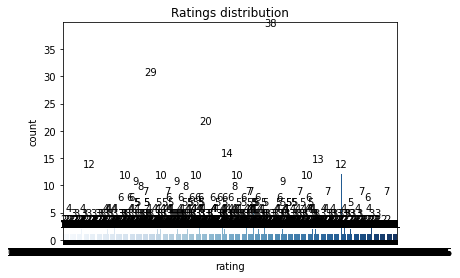

In [13]:
sns.countplot(x='rating', data=df, palette='Blues')

plt.title('Ratings distribution')
for p in plt.gca().patches:
    plt.gca().annotate('{:.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()
#plt.savefig('imgs/unbalance.png')

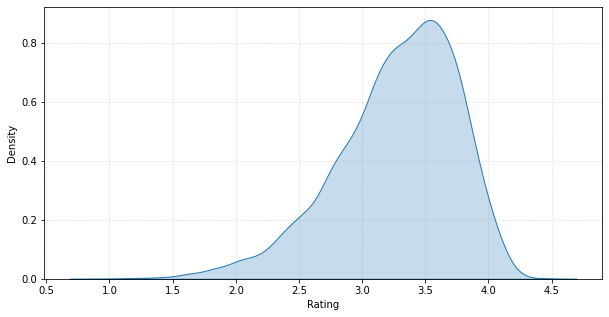

In [100]:
# density plot of ratings
plt.figure(figsize=(10, 5))
sns.kdeplot(df['rating'], shade=True, zorder=2)
plt.grid(True, zorder=1, linestyle='--', alpha=0.3)
#plt.title('Distribution of ratings')
plt.xlabel('Rating')
plt.ylabel('Density')
plt.show()

In [101]:
#create a boxplot of rating
#plt.figure(figsize=(10, 5))
#sns.boxplot(x='rating', data=df, palette='Blues')
#plt.title('Boxplot of ratings')
#plt.show()


### Correlazione tra tags and ratings

Ci sono pochi tag che hanno una correlazione con i rating

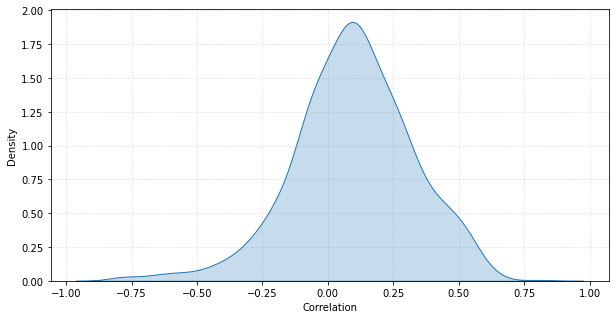

In [102]:
#plot distribution correlation between rating and tags
corr = df.corr()
corr = corr['rating'].sort_values(ascending=False)
corr = corr.drop('rating')

plt.figure(figsize=(10, 5))
sns.kdeplot(corr.values, shade=True, zorder=2)
plt.grid(True, zorder=1, linestyle='--', alpha=0.3)
#plt.title('Distribution of correlation between tags and ratings')
plt.xlabel('Correlation')
plt.ylabel('Density')
plt.show()

(0.55, 0.85)

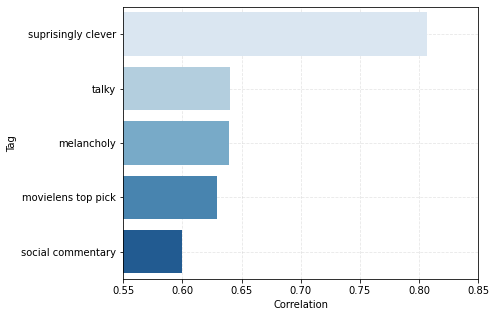

In [103]:
# features correlation
corr = df.corr()
corr = corr['rating'].sort_values(ascending=False)
corr = corr.drop('rating')

plt.subplots(figsize=(14, 5))

plt.subplot(1, 2, 1)
sns.barplot(x=corr.values[:5], y=corr.index[:5], palette='Blues', zorder=2)
plt.grid(True, zorder=-1, linestyle='--', alpha=0.3)
#plt.title('Most correlated tags')
plt.xlabel('Correlation')
plt.ylabel('Tag')
plt.xlim(0.55, 0.85)



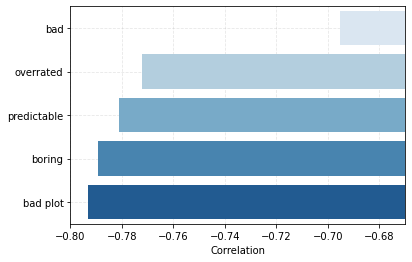

In [104]:
#plt.subplot(1, 2, 2)
sns.barplot(x=corr.values[-5:], y=corr.index[-5:], palette='Blues', zorder=2)
plt.grid(True, zorder=-1, linestyle='--', alpha=0.3)
#plt.title('Least correlated tags')
plt.xlabel('Correlation')
plt.xlim(-.8, -0.67)
plt.ylabel('')
plt.show()

#### Numero di film per ogni genere

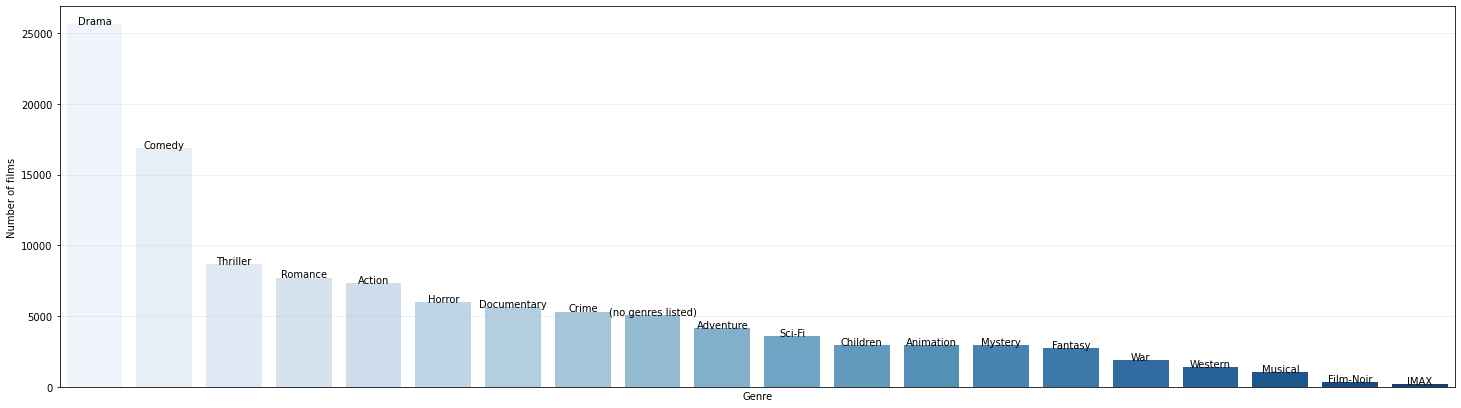

In [116]:
#count the number of film for each genre
genres = movies_df.drop(['movieId', 'title'], axis=1)
genres = genres.sum().sort_values(ascending=False)
genres = genres[genres > 0]

plt.figure(figsize=(25, 7))
sns.barplot(x=genres.index, y=genres.values, palette='Blues')
plt.grid(True, zorder=1, linestyle='--', alpha=0.3)
#plt.title('Number of films for each genre')
plt.ylabel('Number of films')
plt.xlabel('Genre')

# Aggiungi le label sopra le barre
for i, v in enumerate(genres.values):
    #plt.text(i, v, str(v), ha='center')
    plt.text(i, v + 10, genres.index[i], ha='center')
plt.xticks([])
plt.show()

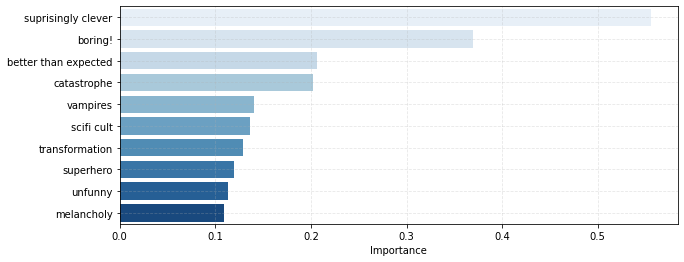

In [117]:
# linear regression importance
from sklearn.linear_model import LinearRegression

X = df.drop('rating', axis=1)
y = df['rating']

rf =LinearRegression()
rf.fit(X, y)

#importance = np.abs(rf.coef_)
importance = rf.coef_

# sort the features by importance
indices = np.argsort(importance)[::-1]
features = X.columns[indices]
indices = indices[:10]
features = features[:10]

plt.figure(figsize=(10, 4))
sns.barplot(x=importance[indices], y=features, palette='Blues')
plt.grid(True, zorder=1, linestyle='--', alpha=0.3)
#plt.title('Tag importance')
plt.xlabel('Importance')

plt.show()

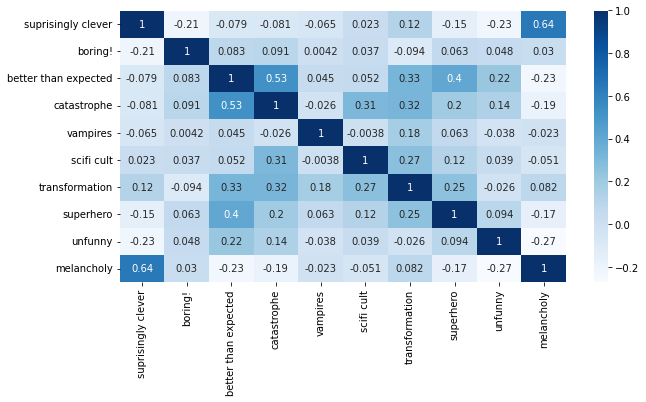

In [118]:
plt.figure(figsize=(10, 5))
sns.heatmap(df[features].corr(), annot=True, cmap='Blues')
#plt.title('Correlation between most important tags')
plt.show()

### 2D Representation of the dataset

/usr/local/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


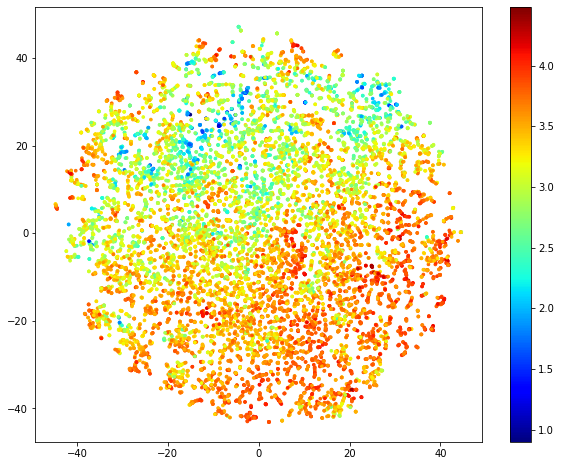

In [119]:
X = df.drop('rating', axis=1)
y = df['rating']
# pca
pca = PCA(n_components=0.95)
pca.fit(X)
X = pca.transform(X)


tsne = TSNE(n_components=2, random_state=1, perplexity=5, n_iter=500)
X_train = tsne.fit_transform(X)
    
plt.figure(figsize=(10,8))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y, cmap='jet',s=7)
#plt.title('2D Representation of the dataset'')
plt.colorbar()
plt.show()


In [ ]:
df.to_csv("dataset-ml-25m/dataset.csv",index=False)